# **Обработка пропусков в данных, кодирование категориальных признаков, масштабирование данных.**


Мы научимся обрабатывать пропуски в данных для количественных (числовых) и категориальных признаков и масштабировать данные. Также мы научимся преобразовывать категориальные признаки в числовые.

**В чем состоит проблема?**
1.   Если в данных есть пропуски, то большинство алгоритмов машинного обучения не будут с ними работать. Даже корреляционная матрица не будет строиться корректно.
2.   Большинство алгоритмов машинного обучения требуют явного перекодирования категориальных признаков в числовые. Даже если алгоритм не требует этого явно, такое перекодирование возможно стоит попробовать, чтобы повысить качество модели.
3. Большинство алгоритмов показывает лучшее качество на масштабированных признаках, в особенности алгоритмы, использующие методы градиентного спуска.

### **Импорт библиотек**
Импортируем библиотеки с помощью команды import. Как правило, все команды import размещают в первой ячейке ноутбука, но мы в этом примере будем подключать все библиотеки последовательно, по мере их использования.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

## **Загрузка и первичный анализ данных** 
Будем использовать dataset "Missing people" из Kaggle: https://www.kaggle.com/arjoonn/missing-people

In [2]:
filename = '../datasets/missing_people.csv'
data = pd.read_csv(filename)

### **Основные характеристики датасета**

In [3]:
# Первые 5 строк датасета
data.head()

,Name,Gender,Relative,Address,AgeStart,AgeEnd,HeightStart,HeightEnd,Built,Date,Dist,State
0,JYOTI,Female,GEETA,", , E 129 A SHOK NAGAR PRIDAY MARKET CHOWK DE...",16,17,122.0,183.0,normalmedium,NaN,G.T.B. ENCLAVE/NORTH EAST,DELHI
1,ABHISHEK,Male,MUKE SHKUMAR,", , JHUGGI NO. N- 78/102, SHIVANAND SCHOOL SEW...",19,20,153.0,183.0,thin,NaN,PUNJABI BAGH/WEST,DEL
2,NaN,Male,RAJE SHKUMAR,", NO, 79, GALI NO. 3 KONDLI DELHI NEW A SHOK N...",19,20,153.0,183.0,thin,NaN,NEW ASHOK NAGAR/EAST,DE
3,JAIPRAKASH,Male,KAMA LKISHORE,", , 15/286, KALYANPURI DELHI KALYA NPURI EAST ...",24,25,153.0,183.0,thin,NaN,KALYANPURI,EAS
4,SADDAM,Male,MUNN A,", , 19-20, KABOOTAR MARKET WELCOM DELHI WELCO ...",21,22,153.0,183.0,thin,NaN,WELCOME/NORT EAST,DELHI


In [ ]:
# Размер датасета
data.shape

(2127, 12)

In [ ]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 2127


In [ ]:
# Список колонок
data.columns

Index(['Name', 'Gender', 'Relative', 'Address', 'AgeStart', 'AgeEnd',
       'HeightStart', 'HeightEnd', 'Built', 'Date', 'Dist', 'State'],
      dtype='object')

In [ ]:
# Список колонок с типами данных
data.dtypes

Name            object
Gender          object
Relative        object
Address         object
AgeStart         int64
AgeEnd           int64
HeightStart    float64
HeightEnd      float64
Built           object
Date           float64
Dist            object
State           object
dtype: object

In [ ]:
# проверим есть ли пропущенные значения
data.isnull().sum()

Name            567
Gender          117
Relative          2
Address           0
AgeStart          0
AgeEnd            0
HeightStart      33
HeightEnd        33
Built            12
Date           2127
Dist              0
State           131
dtype: int64

## **Обработка пропусков в данных**



### **Простые стратегии (удаление или заполнение нулями)**
- удаление колонок, содержащих пустые значения res = data.dropna(axis=1, how='any')
- удаление строк, содержащих пустые значения res = data.dropna(axis=0, how='any')

Удаление может производиться для группы строк или колонок.


In [ ]:
# Удаление колонок, содержащих пустые значения
data_new_1 = data.dropna(axis=1, how='any')
(data.shape, data_new_1.shape)

((2127, 12), (2127, 4))

In [ ]:
# Удаление строк, содержащих пустые значения
data_new_2 = data.dropna(axis=0, how='any')
(data.shape, data_new_2.shape)

((2127, 12), (0, 12))

In [ ]:
# Заполнение всех пропущенных значений нулями
# В данном случае это некорректно, так как нулями заполняются в том числе категориальные колонки
data_fillna = data.fillna(0)

In [ ]:
data.head()

,Name,Gender,Relative,Address,AgeStart,AgeEnd,HeightStart,HeightEnd,Built,Date,Dist,State
0,JYOTI,Female,GEETA,", , E 129 A SHOK NAGAR PRIDAY MARKET CHOWK DE...",16,17,122.0,183.0,normalmedium,NaN,G.T.B. ENCLAVE/NORTH EAST,DELHI
1,ABHISHEK,Male,MUKE SHKUMAR,", , JHUGGI NO. N- 78/102, SHIVANAND SCHOOL SEW...",19,20,153.0,183.0,thin,NaN,PUNJABI BAGH/WEST,DEL
2,NaN,Male,RAJE SHKUMAR,", NO, 79, GALI NO. 3 KONDLI DELHI NEW A SHOK N...",19,20,153.0,183.0,thin,NaN,NEW ASHOK NAGAR/EAST,DE
3,JAIPRAKASH,Male,KAMA LKISHORE,", , 15/286, KALYANPURI DELHI KALYA NPURI EAST ...",24,25,153.0,183.0,thin,NaN,KALYANPURI,EAS
4,SADDAM,Male,MUNN A,", , 19-20, KABOOTAR MARKET WELCOM DELHI WELCO ...",21,22,153.0,183.0,thin,NaN,WELCOME/NORT EAST,DELHI


In [ ]:
data_fillna.head()

,Name,Gender,Relative,Address,AgeStart,AgeEnd,HeightStart,HeightEnd,Built,Date,Dist,State
0,JYOTI,Female,GEETA,", , E 129 A SHOK NAGAR PRIDAY MARKET CHOWK DE...",16,17,122.0,183.0,normalmedium,0.0,G.T.B. ENCLAVE/NORTH EAST,DELHI
1,ABHISHEK,Male,MUKE SHKUMAR,", , JHUGGI NO. N- 78/102, SHIVANAND SCHOOL SEW...",19,20,153.0,183.0,thin,0.0,PUNJABI BAGH/WEST,DEL
2,0,Male,RAJE SHKUMAR,", NO, 79, GALI NO. 3 KONDLI DELHI NEW A SHOK N...",19,20,153.0,183.0,thin,0.0,NEW ASHOK NAGAR/EAST,DE
3,JAIPRAKASH,Male,KAMA LKISHORE,", , 15/286, KALYANPURI DELHI KALYA NPURI EAST ...",24,25,153.0,183.0,thin,0.0,KALYANPURI,EAS
4,SADDAM,Male,MUNN A,", , 19-20, KABOOTAR MARKET WELCOM DELHI WELCO ...",21,22,153.0,183.0,thin,0.0,WELCOME/NORT EAST,DELHI


Как видим, в колонке Date теперь нули.

### **"Внедрение значений" - импьютация (imputation)**
### **Обработка пропусков в числовых данных**
Будем заменять пропущенные числовые данные средним, медианой и наиболее частым значениями

In [ ]:
# Выберем числовые колонки с пропущенными значениями
# Цикл по колонкам датасета
num_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='float64' or dt=='int64'):
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка HeightStart. Тип данных float64. Количество пустых значений 33, 1.55%.
Колонка HeightEnd. Тип данных float64. Количество пустых значений 33, 1.55%.
Колонка Date. Тип данных float64. Количество пустых значений 2127, 100.0%.


In [ ]:
# Выводим только колонки с пропущенными значениями
data_num = data[num_cols]
data_num

,HeightStart,HeightEnd,Date
0,122.0,183.0,NaN
1,153.0,183.0,NaN
2,153.0,183.0,NaN
3,153.0,183.0,NaN
4,153.0,183.0,NaN
...,...,...,...
2122,153.0,275.0,NaN
2123,153.0,31.0,NaN
2124,153.0,214.0,NaN
2125,153.0,31.0,NaN


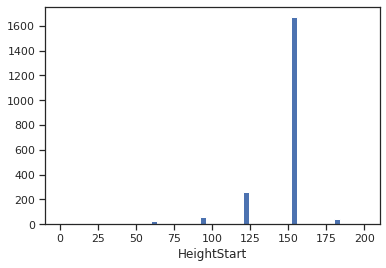

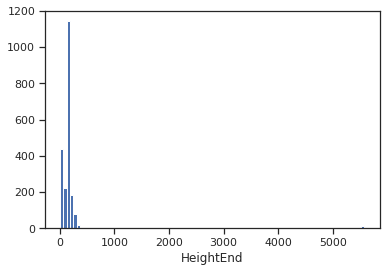

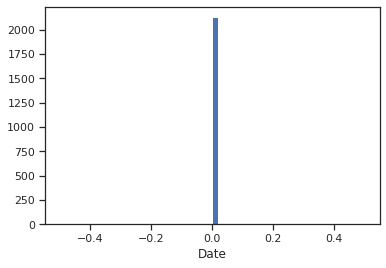

In [ ]:
# Гистограммы признаков числовых колонок с пропущенными значениями
plt.hist(data[data_num.columns[0]], 50, range=(0, 200))
plt.xlabel(data_num.columns[0])
plt.show()

plt.hist(data[data_num.columns[1]], 90)
plt.xlabel(data_num.columns[1])
plt.show()

plt.hist(data_fillna[data_num.columns[2]], 50)
plt.xlabel(data_num.columns[2])
plt.show()

Будем использовать встроенные средства импьютации библиотеки scikit-learn - https://scikit-learn.org/stable/modules/impute.html

In [ ]:
# будем использовать колонку HeightStart для внедрения значений
data_num_HeightStart = data_num[['HeightStart']]
data_num_HeightStart.head()

,HeightStart
0,122.0
1,153.0
2,153.0
3,153.0
4,153.0


In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator

In [ ]:
# смотрим, чтобы были пустые значения
indicator = MissingIndicator()
mask_missing_values_only = indicator.fit_transform(data_num_HeightStart)
mask_missing_values_only

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [ True]])

Замену значений будем производить с помощью 3 стратегий:
- mean: среднее по каждому столбцу
- median: медиана по каждому столбцу (У одномерного распределения медиана — квантиль уровня 0,5, преимущество перед "средним" - огромные значения не изменяют медиану сильно)
- most_frequent: наиболее часто встречающееся значение столбца

In [ ]:
strategies=['mean', 'median', 'most_frequent']

In [ ]:
# функция для замены значений в столбце HeightStart значениями в зависимости от стратегии
def test_num_impute(strategy_param):
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(data_num_HeightStart)
    return data_num_imp[mask_missing_values_only]

In [ ]:
# замена средним
strategies[0], test_num_impute(strategies[0])

('mean', array([168.52340019, 168.52340019, 168.52340019, 168.52340019,
        168.52340019, 168.52340019, 168.52340019, 168.52340019,
        168.52340019, 168.52340019, 168.52340019, 168.52340019,
        168.52340019, 168.52340019, 168.52340019, 168.52340019,
        168.52340019, 168.52340019, 168.52340019, 168.52340019,
        168.52340019, 168.52340019, 168.52340019, 168.52340019,
        168.52340019, 168.52340019, 168.52340019, 168.52340019,
        168.52340019, 168.52340019, 168.52340019, 168.52340019,
        168.52340019]))

In [ ]:
# замена медианой
strategies[1], test_num_impute(strategies[1])

('median',
 array([153., 153., 153., 153., 153., 153., 153., 153., 153., 153., 153.,
        153., 153., 153., 153., 153., 153., 153., 153., 153., 153., 153.,
        153., 153., 153., 153., 153., 153., 153., 153., 153., 153., 153.]))

In [ ]:
# замена наиболее частым
strategies[2], test_num_impute(strategies[2])

('most_frequent',
 array([153., 153., 153., 153., 153., 153., 153., 153., 153., 153., 153.,
        153., 153., 153., 153., 153., 153., 153., 153., 153., 153., 153.,
        153., 153., 153., 153., 153., 153., 153., 153., 153., 153., 153.]))

In [ ]:
# Более сложная функция, которая позволяет задавать колонку и вид импьютации
def test_num_impute_col(dataset, column, strategy_param):
    temp_data = dataset[[column]]
    
    indicator = MissingIndicator()
    mask_missing_values_only = indicator.fit_transform(temp_data)
    
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(temp_data)
    
    filled_data = data_num_imp[mask_missing_values_only]
    
    return column, strategy_param, filled_data.size, filled_data[0], filled_data[filled_data.size-1]

Теперь произведем замену значениями для колонки HeightEnd, но уже с помощью новой функции

In [ ]:
# замена средним
test_num_impute_col(data, 'HeightEnd', strategies[0])

('HeightEnd', 'mean', 33, 176.5482330468004, 176.5482330468004)

In [ ]:
# замена медианой
test_num_impute_col(data, 'HeightEnd', strategies[1])

('HeightEnd', 'median', 33, 183.0, 183.0)

In [ ]:
# замена наиболее частым
test_num_impute_col(data, 'HeightEnd', strategies[2])

('HeightEnd', 'most_frequent', 33, 183.0, 183.0)

### **Обработка пропусков в категориальных данных**
Здесь уже будем обрабатывать данные-строки (тип object). \
Тут подойдут только стратегии замены константой и наиболее частым

In [ ]:
# Выберем категориальные колонки с пропущенными значениями
# Цикл по колонкам датасета
cat_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='object'):
        cat_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка Name. Тип данных object. Количество пустых значений 567, 26.66%.
Колонка Gender. Тип данных object. Количество пустых значений 117, 5.5%.
Колонка Relative. Тип данных object. Количество пустых значений 2, 0.09%.
Колонка Built. Тип данных object. Количество пустых значений 12, 0.56%.
Колонка State. Тип данных object. Количество пустых значений 131, 6.16%.


In [ ]:
# возьмем для обработки колонку Строение тела. Все-таки это важная характеристика для поиска человека
cat_temp_data = data[['Built']]
cat_temp_data.head()

,Built
0,normalmedium
1,thin
2,thin
3,thin
4,thin


In [ ]:
# посмотрим, какие значения может принимать эта колонка. Видим, что здесь есть пустое значение nan
cat_temp_data['Built'].unique()

array(['normalmedium', 'thin', 'strong', 'fat', nan, 'verylanky',
       'muscular', 'veryfat'], dtype=object)

In [ ]:
cat_temp_data[cat_temp_data['Built'].isnull()].shape

(12, 1)

In [ ]:
# Импьютация наиболее частыми значениями
imp2 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data_imp2 = imp2.fit_transform(cat_temp_data)
data_imp2

array([['normalmedium'],
       ['thin'],
       ['thin'],
       ...,
       ['thin'],
       ['normalmedium'],
       ['normalmedium']], dtype=object)

In [ ]:
# Пустые значения отсутствуют. Значения nan уже нет
np.unique(data_imp2)

array(['fat', 'muscular', 'normalmedium', 'strong', 'thin', 'veryfat',
       'verylanky'], dtype=object)

In [ ]:
# Импьютация константой "NA"
imp3 = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='NA')
data_imp3 = imp3.fit_transform(cat_temp_data)
data_imp3

array([['normalmedium'],
       ['thin'],
       ['thin'],
       ...,
       ['thin'],
       ['normalmedium'],
       ['normalmedium']], dtype=object)

In [ ]:
# появилось значение NA
np.unique(data_imp3)

array(['NA', 'fat', 'muscular', 'normalmedium', 'strong', 'thin',
       'veryfat', 'verylanky'], dtype=object)

In [ ]:
data_imp3[data_imp3=='NA'].size

12

## **Преобразование категориальных признаков в числовые**

In [ ]:
cat_enc = pd.DataFrame({'Built':data_imp2.T[0]})
cat_enc

,Built
0,normalmedium
1,thin
2,thin
3,thin
4,thin
...,...
2122,thin
2123,normalmedium
2124,thin
2125,normalmedium


### **Кодирование категорий целочисленными значениями**
Кодирование категорий целочисленными значениями. \
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [ ]:
# Закодируем значения столбца цифрами с помощью LabelEncoder
le = LabelEncoder()
cat_enc_le = le.fit_transform(cat_enc['Built'])

In [ ]:
cat_enc['Built'].unique()

array(['normalmedium', 'thin', 'strong', 'fat', 'verylanky', 'muscular',
       'veryfat'], dtype=object)

In [ ]:
# как видим, в наборе теперь цифры
np.unique(cat_enc_le)

array([0, 1, 2, 3, 4, 5, 6])

In [ ]:
# можно посмотреть исходный строковый набор значений столбца
le.inverse_transform([0, 1, 2, 3, 4, 5, 6])

array(['fat', 'muscular', 'normalmedium', 'strong', 'thin', 'veryfat',
       'verylanky'], dtype=object)

### **Кодирование категорий наборами бинарных значений**
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

In [ ]:
ohe = OneHotEncoder()
cat_enc_ohe = ohe.fit_transform(cat_enc[['Built']])

In [ ]:
cat_enc.shape

(2127, 1)

In [ ]:
# в столбце 7 разных вариантов значений, соответственно, чтобы закодировать нужно 7 знаков в бинарном числе
cat_enc_ohe.shape

(2127, 7)

In [ ]:
cat_enc_ohe

<2127x7 sparse matrix of type '<class 'numpy.float64'>'
	with 2127 stored elements in Compressed Sparse Row format>

In [ ]:
# посмотрим первые 10 значений закодированного столбца
cat_enc_ohe.todense()[0:10]

matrix([[0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0.]])

In [ ]:
# исходный набор со строковыми значениями
cat_enc.head(10)

,Built
0,normalmedium
1,thin
2,thin
3,thin
4,thin
5,thin
6,thin
7,thin
8,normalmedium
9,thin


### **Быстрый вариант one-hot кодирования**
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html

In [ ]:
# кодирование набора с импьютацией пустых значений наиболее частым значением
pd.get_dummies(cat_enc).head()

,Built_fat,Built_muscular,Built_normalmedium,Built_strong,Built_thin,Built_veryfat,Built_verylanky
0,0,0,1,0,0,0,0
1,0,0,0,0,1,0,0
2,0,0,0,0,1,0,0
3,0,0,0,0,1,0,0
4,0,0,0,0,1,0,0


In [ ]:
# кодирование набора с пропусками
pd.get_dummies(cat_temp_data, dummy_na=True).head()

,Built_fat,Built_muscular,Built_normalmedium,Built_strong,Built_thin,Built_veryfat,Built_verylanky,Built_nan
0,0,0,1,0,0,0,0,0
1,0,0,0,0,1,0,0,0
2,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,0
4,0,0,0,0,1,0,0,0


## **Масштабирование данных**
Термины "масштабирование" и "нормализация" часто используются как синонимы, но это неверно. Масштабирование предполагает изменение диапазона измерения величины, а нормализация - изменение распределения этой величины. В этом разделе рассматривается только масштабирование.

Если признаки лежат в различных диапазонах, то необходимо их нормализовать. Как правило, применяют два подхода:
- MinMax масштабирование: x_new = (x - min(X)) / (max(X) - min(X)) \
В этом случае значения лежат в диапазоне от 0 до 1
- Масштабирование данных на основе Z-оценки: x_new = (x - AVG(X)) / σ(X) \
где X - матрица объект-признак, AVG(X) - среднее значение, σ - среднеквадратичное отклонение.

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

### **MinMax масштабирование**

Возьмем столбик HeightEnd и выведем для него диграмму, в которой какая-то часть значений (после 5000) оказалась в диапазоне, сильно отличающемся от диапазона остальных значений

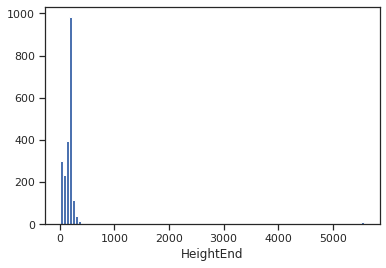

In [ ]:
plt.hist(data['HeightEnd'], 100)
plt.xlabel('HeightEnd')
plt.show()

In [ ]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[['HeightEnd']])

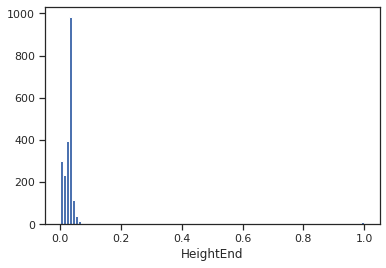

In [ ]:
plt.hist(sc1_data, 100)
plt.xlabel('HeightEnd')
plt.show()

### **Масштабирование данных на основе Z-оценки - StandardScaler**
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler

In [ ]:
sc2 = StandardScaler()
sc2_data = sc2.fit_transform(data[['HeightEnd']])

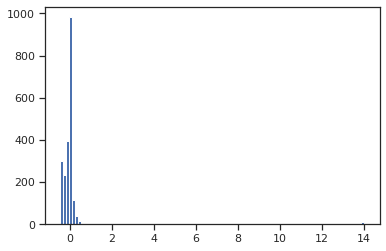

In [ ]:
plt.hist(sc2_data, 100)
plt.show()

## **Очистка остальных столбцов датасета**
Основываясь на том, что мы делали выше, обработаем все остальные столбцы и таким образом полностью почистим набор

In [ ]:
data.describe()

In [ ]:
# Удалим колонку Date, т.к. она полностью пустая
data_clean = data
data_clean = data_clean.drop(columns = ['Date'], axis = 1)

### **Импьютация для числовых колонок**

In [ ]:
# импьютация нужной колонки с помощью нужной стратегии
def func_impute_col(dataset, column, strategy_param):
    temp_data = dataset[[column]]
    
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(temp_data)
    
    return data_num_imp

In [ ]:
# замена медианой HeightStart
col_heightstart_imp = func_impute_col(data_clean, 'HeightStart', strategies[1])
data_clean[['HeightStart']] = col_heightstart_imp

In [ ]:
# замена медианой HeightEnd
col_heightend_imp = func_impute_col(data_clean, 'HeightEnd', strategies[1])
data_clean[['HeightEnd']] = col_heightstart_imp

### **Импьютация для строковых колонок**

In [ ]:
# Импьютация наиболее частыми значениями колонки Built
imp_freq = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data_clean[['Built']] = imp_freq.fit_transform(data_clean[['Built']])

In [ ]:
# Импьютация константой Unknown колонки Name
imp_unknown = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='NA')
data_clean[['Name']] = imp_unknown.fit_transform(data_clean[['Name']])

In [ ]:
# Импьютация константой Unknown колонки Gender
data_clean[['Gender']] = imp_unknown.fit_transform(data_clean[['Gender']])

In [ ]:
# Импьютация константой Unknown колонки Relative
data_clean[['Relative']] = imp_unknown.fit_transform(data_clean[['Relative']])

In [ ]:
# Импьютация наиболее частыми значениями колонки State
data_clean[['State']] = imp_freq.fit_transform(data_clean[['State']])

In [ ]:
# в наборе не осталось пустых значений
data_clean.isnull().sum()

Name           0
Gender         0
Relative       0
Address        0
AgeStart       0
AgeEnd         0
HeightStart    0
HeightEnd      0
Built          0
Dist           0
State          0
dtype: int64